In [1]:
import numpy as np
import matplotlib.pyplot as plt
import audacity
import TransferFunctions as tf
import scipy.signal as sig

%matplotlib notebook

In [4]:
dfiles = ['transfer/b-foot/2tieclip_reference_sines.aup']

dfiles.extend(('transfer/b-foot/2201_openstart.aup',
               'transfer/b-foot/2201_closing_2.aup',
               'transfer/b-foot/2201_closing_4.aup',
               'transfer/b-foot/2201_closing_6.aup',
               'transfer/b-foot/2201_closing_8.aup',
               'transfer/b-foot/2201_closing_10.aup',
               'transfer/b-foot/2201_closing_12.aup',
               'transfer/b-foot/2201_closing_13.aup',
               'transfer/b-foot/2201_closing_16.aup',
              ))

In [5]:
# Load File, read data, and pad to have same length on all channels

nfft=1024*4

tfdata = []

for file in dfiles:
    print(file)
    au = audacity.Aup(file)
    rdata = []
    maxl = 0
    for ii in range(au.nchannels):
        rdata.append(au.get_channel_data(ii))
        maxl = max(maxl,len(rdata[-1]))

    data = np.zeros((maxl,len(rdata)))
    for ii,rd in enumerate(rdata):
        data[:len(rd),ii]=rd
        
    delay=tf.determineDelay(data[:,0]/np.mean(data[:,0]),data[:,2]/np.mean(data[:,2]),maxdel=2**15)
    print("Delay: %d samples"%delay)
    data[:,0]=np.roll(data[:,0],delay)
    
    sr=au.rate
   
    tfxy,ff=tf.tfe(data[:,3],data[:,2],Fs=sr,NFFT=nfft)
    #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
    ff,coh=sig.coherence(data[:,2],data[:,3],fs=sr,nperseg=nfft)

    datadict={'tf':tfxy,'coh':coh}
    
    for chno in [au.nchannels-2,au.nchannels-1]:
        tfxy,ff=tf.tfe(data[:,chno],data[:,0],Fs=sr,NFFT=nfft)
        #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
        # ff,coh=sig.coherence(data[:,0],data[:,chno],fs=sr,nperseg=nfft)
        datadict['mic%d'%(chno-1)]=tfxy

    tfdata.append(datadict)


transfer/b-foot/2tieclip_reference_sines.aup
Delay: 1763 samples
transfer/b-foot/2201_openstart.aup
Delay: 1763 samples
transfer/b-foot/2201_closing_2.aup
Delay: 7496 samples
transfer/b-foot/2201_closing_4.aup
Delay: 7496 samples
transfer/b-foot/2201_closing_6.aup
Delay: 7496 samples
transfer/b-foot/2201_closing_8.aup
Delay: 7496 samples
transfer/b-foot/2201_closing_10.aup
Delay: 7496 samples
transfer/b-foot/2201_closing_12.aup
Delay: 1763 samples
transfer/b-foot/2201_closing_13.aup
Delay: 1763 samples
transfer/b-foot/2201_closing_16.aup
Delay: 7496 samples


<IPython.core.display.Javascript object>


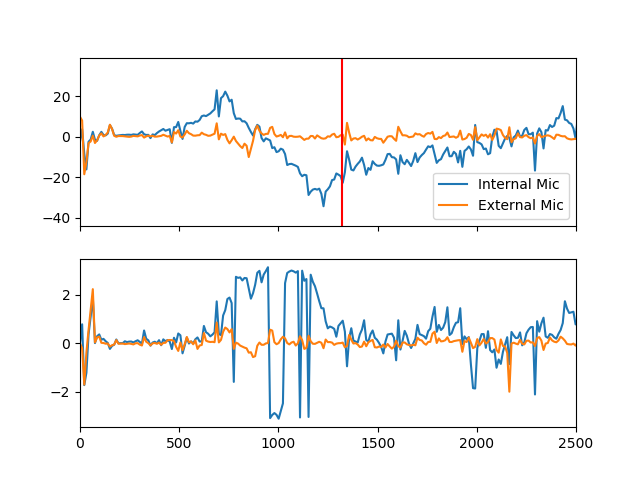

(0, 2500)

In [6]:
fig,ax = plt.subplots(2,sharex=True)

recno = 1
refno = 0
fig.set_label('Recording %d, internal vs external spectra' % recno)
ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['mic2']/tfdata[refno]['mic2'])), label='Internal Mic')
ax[1].plot(ff,(np.angle(tfdata[recno]['mic2']/tfdata[refno]['mic2'])))

ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['mic1']/tfdata[refno]['mic1'])), label='External Mic')
ax[1].plot(ff,(np.angle(tfdata[recno]['mic1']/tfdata[refno]['mic1'])))

ax[0].axvline(1319, C='r')
ax[0].legend(loc='lower right')
ax[0].set_xlim((0, 2500))


<IPython.core.display.Javascript object>


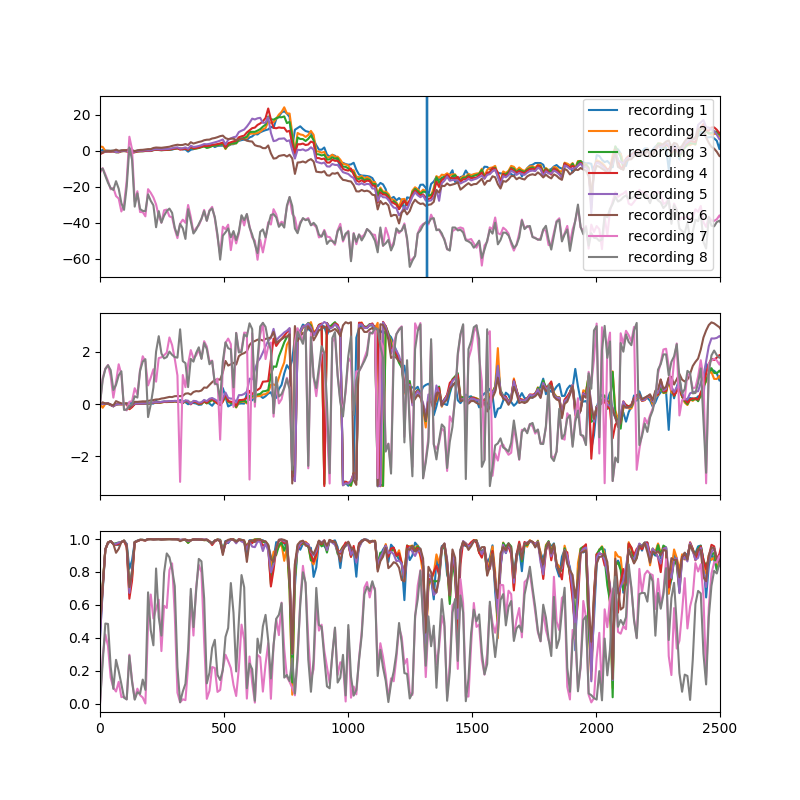

In [7]:
fig,ax = plt.subplots(3,sharex=True, figsize=((8, 8)))
fig.set_label('Transfer functions')

# chno = 1
refno = 0
for recno in [1,2,3,4,5,6,7,8]:

    ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['tf']/tfdata[refno]['tf'])), label='recording %d' % recno)
    ax[0].set_xlim((0, 2500))
    ax[0].legend(loc='lower right')
    ax[0].axvline(1319)
    ax[1].plot(ff,(np.angle(tfdata[recno]['tf']/tfdata[refno]['tf'])))
    #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
    ax[2].plot(ff,np.min([tfdata[recno]['coh'],tfdata[refno]['coh']],axis=0))


In [18]:
gamma=1.4
P_a=101000
rho_a=1.29

D=0.0139
S=np.pi*D**2/4
l=0.0014
L=l+0.3*D

bore=0.0186
foot=0.16

V=(np.pi*bore**2/4)*foot

omega=np.sqrt((gamma*S*P_a)/(V*L*rho_a))
f=omega/(2*np.pi)
f

1319.0590816044551